In [1]:
"""Chapter 3 | Linear Regression applied exercises."""

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from ISLP import load_data
from ISLP.models import (
    ModelSpec as MS,
    summarize,
    poly
)
from pandas.plotting import scatter_matrix
from statsmodels.stats.anova import anova_lm


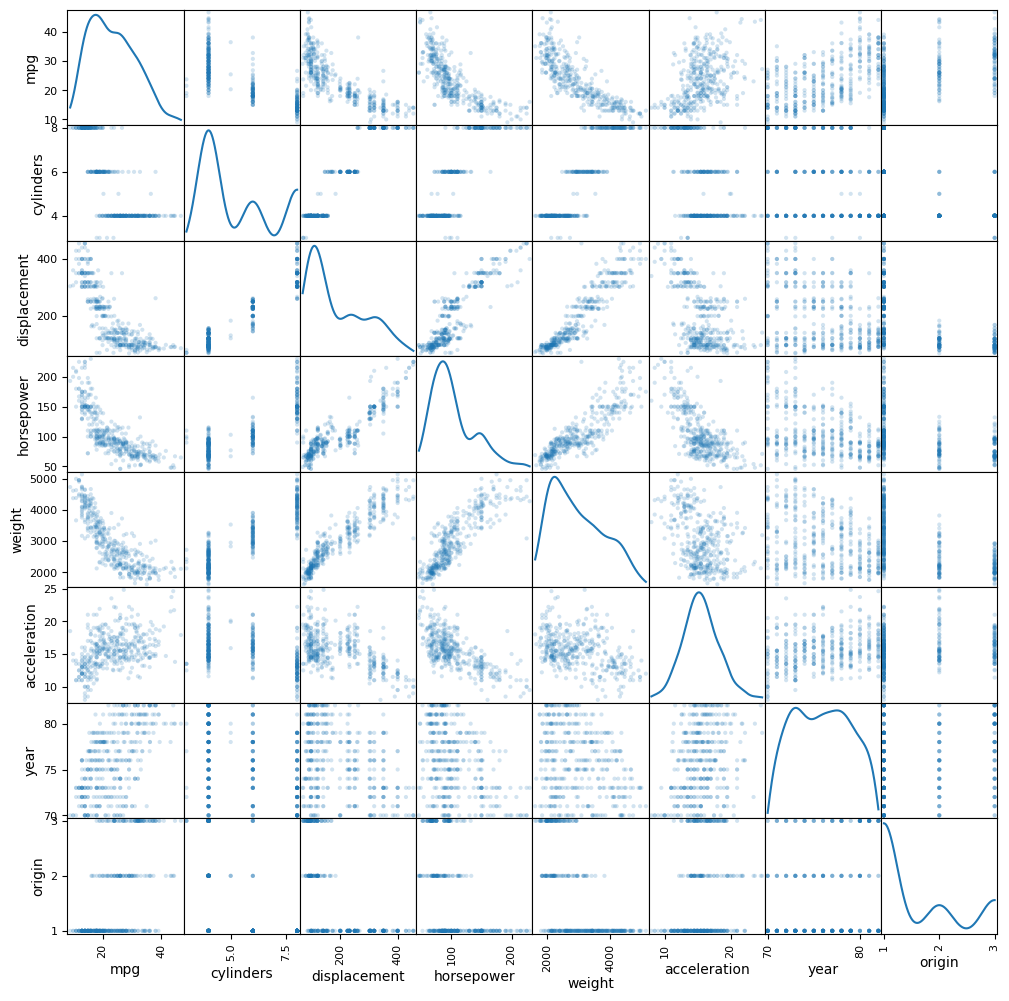

In [2]:
# (a) Produce a scatterplot matrix which includes all of the variables
# in the data set.

# Load dataset
auto_data = load_data("Auto")

# Create scatter plot matrix
scatter_matrix(auto_data, alpha=0.2, figsize=(12, 12), diagonal='kde')

# Show the plot
plt.show()

In [3]:
# Compute the matrix of correlations between the variables using
# the DataFrame.corr() method.
auto_data.corr()

/var/folders/cd/4k116xqn6517072zh0kmjm980000gn/T/ipykernel_15577/4055675901.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto_data.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [4]:
# (c) Use the sm.OLS() function to perform a multiple linear regression with
# mpg as the response and all other variables except name as the predictors.
# Use the summarize() function to print the results. Comment on the output.

terms = auto_data.columns.drop(["mpg", "name"])
X = MS(terms).fit_transform(auto_data)
y = auto_data["mpg"]
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [5]:
# i. Is there a relationship between the predictors and the response? Use the
# anova_lm() function from statsmodels to answer this question.
formula = ' + '.join(terms)
model = smf.ols(f'mpg ~ {formula}', data=auto_data).fit()
anova_lm(model)

# We can determine if there is a relationship between the predictors and the
# response by examining the p-values displayed in the PR(>F) column.
# The 'cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin'
# predictors all appear to have a very small p-values which signify strong
# relationships with the response. Acceleration has a large p-value and
# therefore likely does not have a significant relationship with 'mpg'.
# We can confidently say most variables have a relationship with the
# response variable.

# ii. Which predictors appear to have a statistically significant
# relationship to the response?

# The 'cylinders', 'displacement', 'horsepower', 'weight', 'year', 'origin'
# predictors all appear to be statistically significant.

# iii. What does the coefficient for the year variable suggest?

# The coefficient suggests that newer vechicles tend to have higher 'mpg'.

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


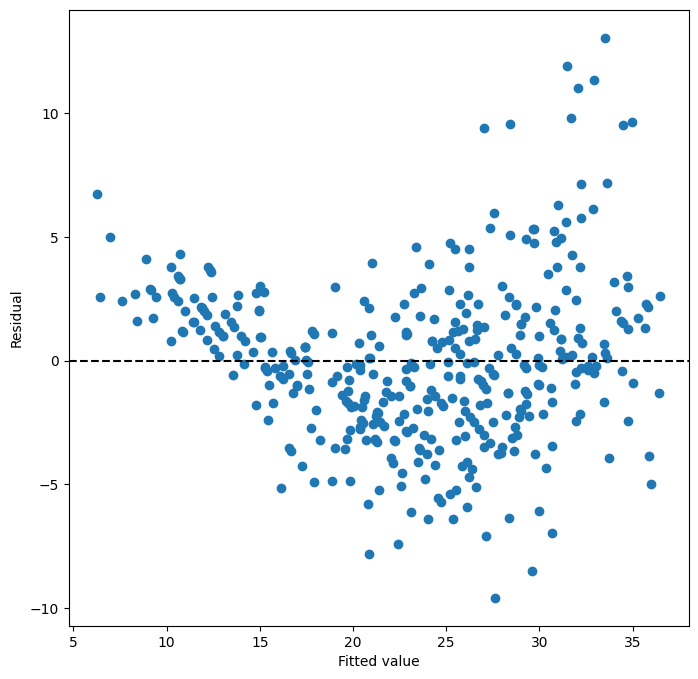

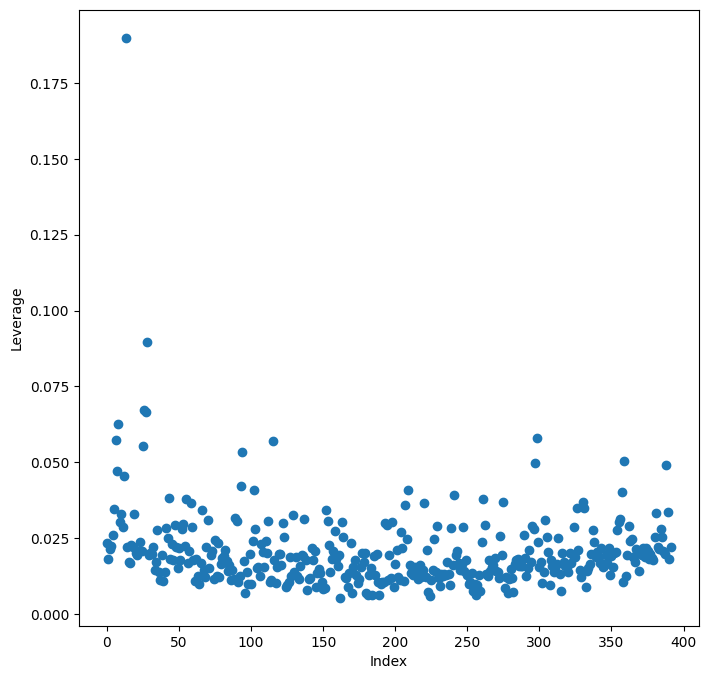

In [6]:
# (d)  Produce some of diagnostic plots of the linear regression fit as
# described in the lab. Comment on any problems you see with the fit.
# Do the residual plots suggest any unusually large outliers? Does the
# leverage plot identify any observations with unusually high leverage?

ax = plt.subplots(figsize=(8, 8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')
plt.show()

infl = results.get_influence()
ax = plt.subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)
plt.show()

# The first plot shows the relationship is curved and non-linear. There is
# also increasing spread of the residuals (heteroscedasticity) as we look
# further to the right of the x-axis. This suggests variance of errors that
# is not constant across all levels of the predictor. There does not appear
# to be any problematic outliers.

# The second plot appears to show a single extremely high leverage point
# towards the left side of the x-axis.

In [7]:
# (e) Fit some models with interactions as described in the lab.
# Do any interactions appear to be statistically significant?
X = MS(
    [
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
        ("cylinders", "weight")
    ]
).fit_transform(auto_data)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,7.3143,5.008,1.461,0.145
cylinders,-5.0347,0.580,-8.687,0.000
displacement,0.0156,0.007,2.287,0.023
horsepower,-0.0314,0.013,-2.489,0.013
weight,-0.0150,0.001,-13.513,0.000
acceleration,0.1006,0.090,1.121,0.263
year,0.7813,0.046,16.834,0.000
origin,0.8030,0.262,3.068,0.002
cylinders:weight,0.0015,0.000,9.088,0.000


In [8]:
X = MS(
    [
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
        ("horsepower", "displacement")
    ]
).fit_transform(auto_data)
model3 = sm.OLS(y, X)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,-1.8935,4.302000,-0.440,0.660
cylinders,0.6466,0.302000,2.143,0.033
displacement,-0.0749,0.011000,-6.859,0.000
horsepower,-0.1975,0.021000,-9.624,0.000
weight,-0.0031,0.001000,-4.861,0.000
acceleration,-0.2131,0.091000,-2.351,0.019
year,0.7379,0.045000,16.534,0.000
origin,0.6891,0.253000,2.727,0.007
horsepower:displacement,0.0005,0.000048,10.878,0.000


In [9]:
# I fit one model with the interaction term
# ('cylinders', 'weight') and another model with the interaction term
# ('horsepower', 'displacement'). Both interaction terms appear to be
# statistically significant in their respective models. This intuitively
# makes sense as vehicles with more cylinders tend to have larger and heavier
# engines. Vehicles that have higher horsepower tend to have higher
# displacement.

In [10]:
# (f) Try a few different transformations of the variables, such as log(X),
# √X, X2. Comment on your findings.

auto_data["log_of_displacement"] = np.log(auto_data["displacement"])
X = MS(
    [
        "cylinders",
        "log_of_displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
        ("horsepower", "displacement")
    ]
).fit_transform(auto_data)
model4 = sm.OLS(y, X)
summarize(model4.fit())

# The log of displacement appears to be more statistically significant than
# the displacement predictor when comparing the p-values of each predictor.
# The logarithmic transformation of displacement might be more statistically
# significant because it more accurately represents the underlying
# relationship between displacement and mpg, improves the normality of the
# predictor, stabilizes variance, and linearizes the relationship, all of
# which contribute to a better model fit.

,coef,std err,t,P>|t|
intercept,23.9918,6.69700,3.582,0.000
cylinders,0.2823,0.28000,1.010,0.313
log_of_displacement,-7.9252,1.26900,-6.246,0.000
horsepower,-0.1366,0.01800,-7.767,0.000
weight,-0.0037,0.00100,-6.002,0.000
acceleration,-0.1297,0.08900,-1.460,0.145
year,0.7619,0.04500,16.942,0.000
origin,0.5548,0.26900,2.065,0.040
horsepower:displacement,0.0003,0.00003,10.002,0.000


In [11]:
X = MS(
    [
        poly('cylinders', degree=2),
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "year",
        "origin",
    ]
).fit_transform(auto_data)
model5 = sm.OLS(y, X)
summarize(model5.fit())

# The quadratic term introduced for cylinders in row 3 appears to be
# statistically significant with a very low p-value. However, the linear
# term appears to not be statistically significant.

,coef,std err,t,P>|t|
intercept,-18.5982,4.573,-4.067,0.000
"poly(cylinders, degree=2)[0]",-11.2776,10.730,-1.051,0.294
"poly(cylinders, degree=2)[1]",15.7468,3.621,4.349,0.000
displacement,0.0198,0.007,2.694,0.007
horsepower,-0.0313,0.014,-2.254,0.025
weight,-0.0063,0.001,-9.848,0.000
acceleration,0.1049,0.097,1.083,0.279
year,0.7453,0.050,14.954,0.000
origin,1.2279,0.276,4.454,0.000
